In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [10]:
trades=pd.read_csv("D:\Datascience Task\project market trading\data\historical_data.csv")
sentiment = pd.read_csv("data/fear_greed_index.csv")

sentiment['date']=pd.to_datetime(sentiment['date'])
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    format="%d-%m-%Y %H:%M",
    errors='coerce'
)
trades['date'] = trades['Timestamp IST'].dt.floor('D')


In [9]:
# Long / Short flag



In [11]:
df = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='inner'
)
df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211213,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,Greed
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,Greed
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,Greed
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,Greed


In [12]:
# Win flag
df['is_win'] = (df['Closed PnL'] > 0).astype(int)

# Long / Short flag
df['is_long'] = (df['Side'].str.upper() == 'BUY').astype(int)

# Absolute size
df['abs_size_usd'] = df['Size USD'].abs()


In [13]:
daily_trader_metrics = df.groupby(
    ['date', 'Account', 'classification']
).agg(
    daily_pnl=('Closed PnL', 'sum'),
    trades_per_day=('Trade ID', 'count'),
    avg_trade_size_usd=('abs_size_usd', 'mean'),
    win_rate=('is_win', 'mean'),
    long_ratio=('is_long', 'mean')
).reset_index()


In [14]:
sentiment_map = {
    'Extreme Fear': -2,
    'Fear': -1,
    'Neutral': 0,
    'Greed': 1,
    'Extreme Greed': 2
}

daily_trader_metrics['sentiment_encoded'] = (
    daily_trader_metrics['classification'].map(sentiment_map)
)


In [15]:
cluster_features = [
    'sentiment_encoded',
    'trades_per_day',
    'avg_trade_size_usd',
    'long_ratio',
    'win_rate'
]

X = daily_trader_metrics[cluster_features].dropna()


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

daily_trader_metrics = daily_trader_metrics.loc[X.index]
daily_trader_metrics['cluster'] = clusters


d:\Datascience Task\project market trading\venv\lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Datascience Task\project market trading\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "d:\Datascience Task\project market trading\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
  File "d:\Datascience Task\project market trading\venv\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "d:\Datascience Task\project market tradin

In [18]:
cluster_summary = daily_trader_metrics.groupby('cluster').agg(
    avg_trades_per_day=('trades_per_day', 'mean'),
    avg_trade_size=('avg_trade_size_usd', 'mean'),
    avg_long_ratio=('long_ratio', 'mean'),
    avg_win_rate=('win_rate', 'mean'),
    avg_daily_pnl=('daily_pnl', 'mean')
)

cluster_summary


,avg_trades_per_day,avg_trade_size,avg_long_ratio,avg_win_rate,avg_daily_pnl
cluster,,,,,
0,45.531469,7747.537894,0.877221,0.113491,98.503755
1,154.728551,5345.321157,0.186915,0.141658,2641.482042
2,75.110503,7667.028759,0.420100,0.721797,9087.486907


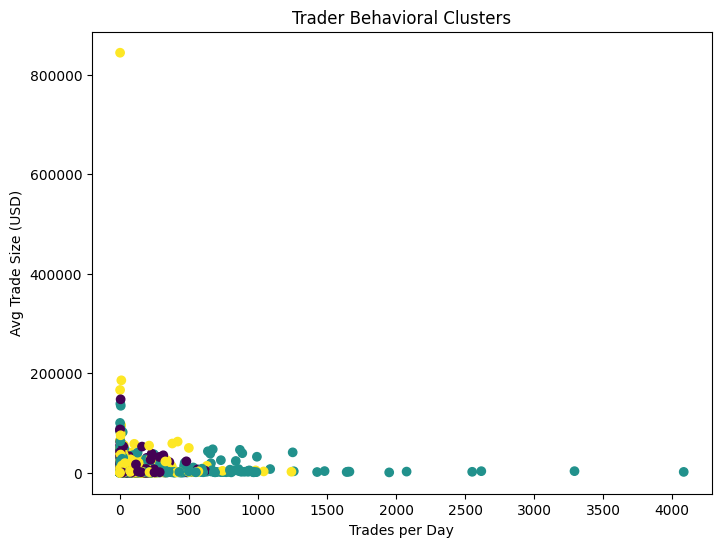

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(
    daily_trader_metrics['trades_per_day'],
    daily_trader_metrics['avg_trade_size_usd'],
    c=daily_trader_metrics['cluster']
)
plt.xlabel("Trades per Day")
plt.ylabel("Avg Trade Size (USD)")
plt.title("Trader Behavioral Clusters")
plt.show()
